# **Final Project Overview: Classify Waste Products Using Transfer Learning**

Estimated Reading Time: 15 minutes

## **Project Scenario**

The city of GreenCity has been struggling with waste management, especially in distinguishing between recyclable and organic waste. The local waste management organization, EcoClean, is tasked with improving the efficiency of waste sorting. However, the current manual process is both time-consuming and error-prone. To enhance the system, EcoClean wants you to develop an AI-powered solution that can automatically classify waste products using image recognition techniques. This project aims to build a model that can differentiate between recyclable and organic waste products using transfer learning.

## **Project Background**

EcoClean currently lacks an efficient and scalable method to automate the waste sorting process. The manual sorting of waste is not only labor-intensive but also prone to errors, leading to contamination of recyclable materials. The goal of this project is to leverage machine learning and computer vision to automate the classification of waste products, improving efficiency and reducing contamination rates. The project will use transfer learning with a pre-trained VGG16 model to classify images.

# **Aim**

The aim of the project is to develop an automated waste classification model that can accurately differentiate between recyclable and organic waste based on images. By the end of this project, you will have trained, fine-tuned, and evaluated a model using transfer learning, which can then be applied to real-world waste management processes.

## **Final Output: A trained model that classifies waste images into recyclable and organic categories.**

## **Learning objectives**

After completing this project, you will be able to:

- Apply transfer learning using the VGG16 model for image classification
- Prepare and preprocess image data for a machine learning task
- Fine-tune a pre-trained model to improve classification accuracy
- Evaluate the model's performance using appropriate metrics
- Visualize model predictions on test data

## **Instructions**

To achieve the above objectives, you will complete the following tasks:

- Task 1: Print the version of TensorFlow
- Task 2: Create a test_generator using the test_datagen object
- Task 3: Print the length of the train_generator
- Task 4: Print the summary of the model
- Task 5: Compile the model
- Task 6: Plot accuracy curves for training and validation sets (extract_feat_model)
- Task 7: Plot loss curves for training and validation sets (fine-tune model)
- Task 8: Plot accuracy curves for training and validation sets (fine-tune model)
- Task 9: Plot a test image using Extract Features Model (index_to_plot = 1)
- Task 10: Plot a test image using Fine-Tuned Model (index_to_plot = 1)

Let's start the project by developing and deploying a trained model that classifies waste images into recyclable and organic categories.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Task 1: Print tensorflow version**

In [2]:
# Print tensorflow version
print(tf.__version__)

2.18.0


In [3]:
# Download and unzip the dataset
import requests
import zipfile
from tqdm import tqdm
import os

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/kd6057VPpABQ2FqCbgu9YQ/o-vs-r-split-reduced-1200.zip"
file_name = "data/o-vs-r-split-reduced-1200.zip"
data_name = "data/o-vs-r-split"

def extract_file(file_name):
    print("Extracting file with progress")
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        members = zip_ref.infolist() 
        with tqdm(total=len(members), unit='file') as progress_bar:
            for member in members:
                zip_ref.extract(member)
                progress_bar.update(1)
    print("Finished extracting file")

if not os.path.exists(file_name) and not os.path.exists(data_name):
    print("Downloading file")
    with requests.get(url, stream=True) as response:
        response.raise_for_status()
        with open(file_name, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)


    extract_file(file_name)

    print("Finished extracting file")
    os.remove(file_name)
else:
    print("File already exists")

File already exists


In [4]:
# Declare the hyperparameters
BATCH_SIZE = 32
IMG_ROWS, IMG_COLS = 150, 150
EPOCHS = 10
CLASSES = 2
VAL_SPLIT = 0.2
VERBOSE = 1
PATH = "data/o-vs-r-split/train/"
PATH_TEST = "data/o-vs-r-split/test/"
SHAPE = (IMG_ROWS, IMG_COLS, 3)
LABELS = ['O', 'R']
SEED = 42

### **Task 2: Create a test_generator using the test_datagen object**

In [ ]:
# Create an instance of the ImageDataGenerator for train, val and test
train_datagen = ImageDataGenerator(
    validation_split=VAL_SPLIT,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    validation_split=VAL_SPLIT,
    rescale=1./255
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create the train and val generators
train_generator = train_datagen.flow_from_directory(
    directory=PATH,
    target_size=(IMG_ROWS, IMG_COLS),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=SEED,
    shuffle=True,
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    directory=PATH_TEST,
    target_size=(IMG_ROWS, IMG_COLS),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=SEED,
    shuffle=True,
    subset='validation'
)

Found 800 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
# Create the test generator from the test_datagen object
test_generator = test_datagen.flow_from_directory(
    directory=PATH_TEST,
    target_size=(IMG_ROWS, IMG_COLS),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=SEED,
    shuffle=False,
)

Found 200 images belonging to 2 classes.


### **Task 3: Print the length of train_generator**

In [7]:
# Print the train generator length
print(len(train_generator))

25


### **Task 4: Print the summary of the model**

In [8]:
# Create the model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout

vgg = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_ROWS, IMG_COLS, 3))
output = vgg.layers[-1].output
output = Flatten()(output)
base_model = Model(vgg.input, output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False
    
model = Sequential()
model.add(base_model)
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional (Functional)         │ (None, 8192)           │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,880,193 (64.39 MB)

 Trainable params: 2,164,481 (8.26 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

### **Task 5: Compile the model**

In [36]:
# Compile the model and print the summary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.mixed_precision import set_global_policy

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

set_global_policy('mixed_float16')

checkpoint_path = "feat_extract_model.keras"

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    mode='min',
    save_best_only=True,
    monitor='val_loss',
)

extract_feat_model = model.fit(
    train_generator,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint]
)

d:\Coding\ibm-ai-engineering\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 596ms/step - accuracy: 0.7439 - loss: 0.5999 - val_accuracy: 0.8438 - val_loss: 0.3645 - learning_rate: 0.0010
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 582ms/step - accuracy: 0.8680 - loss: 0.3378 - val_accuracy: 0.8125 - val_loss: 0.3817 - learning_rate: 0.0010
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 597ms/step - accuracy: 0.8901 - loss: 0.2690 - val_accuracy: 0.7188 - val_loss: 0.7834 - learning_rate: 0.0010
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.8727 - loss: 0.3165
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 598ms/step - accuracy: 0.8729 - loss: 0.3155 - val_accuracy: 0.8438 - val_loss: 0.4494 - learning_rate: 0.0010
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 615ms/step - accuracy: 0.9124 - loss: 0.2519 - val_accuracy: 0.8438 - val_loss: 0.3182 - learning_rate: 2.0000e-04
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 601ms/step - accuracy: 0.9472 - loss:

### **Task 6: Plot accuracy curves for training and validation sets (extract_feat_model)**

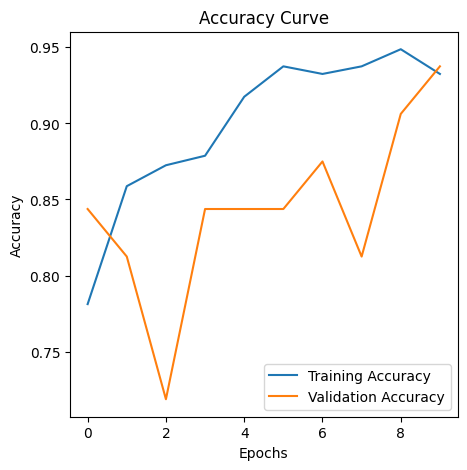

In [11]:
import matplotlib.pyplot as plt

history = extract_feat_model

# Plot accuracy curve for train and val sets from extract_feat_model
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
from tensorflow.keras.optimizers import Adam
# Fine tune model
# Unfreeze the last 5 layers
for layer in base_model.layers[-2:]:
    layer.trainable = True
    
# Freeze the batch normalization layers
for layer in base_model.layers:
    if 'batch_normalization' in layer.name:
        layer.trainable = False
        
# Re-compiling the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional (Functional)         │ (None, 8192)           │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,880,193 (64.39 MB)

 Trainable params: 2,164,481 (8.26 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [13]:
checkpoint_path = "fine_tune_model.keras"

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    mode='min',
    save_best_only=True,
    monitor='val_loss',
)

fine_tune_model = model.fit(
    train_generator,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint]
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 608ms/step - accuracy: 0.9278 - loss: 0.1791 - val_accuracy: 0.9062 - val_loss: 0.2652 - learning_rate: 1.0000e-05
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 596ms/step - accuracy: 0.9344 - loss: 0.1611 - val_accuracy: 0.9375 - val_loss: 0.2057 - learning_rate: 1.0000e-05
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 584ms/step - accuracy: 0.9393 - loss: 0.1619 - val_accuracy: 0.9062 - val_loss: 0.2571 - learning_rate: 1.0000e-05
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 605ms/step - accuracy: 0.9423 - loss: 0.2060 - val_accuracy: 0.9375 - val_loss: 0.2303 - learning_rate: 1.0000e-05
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.9519 - loss: 0.1321
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 602ms/step - accuracy: 0.9519 - loss: 0.1319 - val_accuracy: 0.9375 - val_loss: 0.2437 - learning_rate: 1.0000e-05
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 597ms/step - accuracy

### **Task 7: Plot loss curves for training and validation sets (fine tune model)**

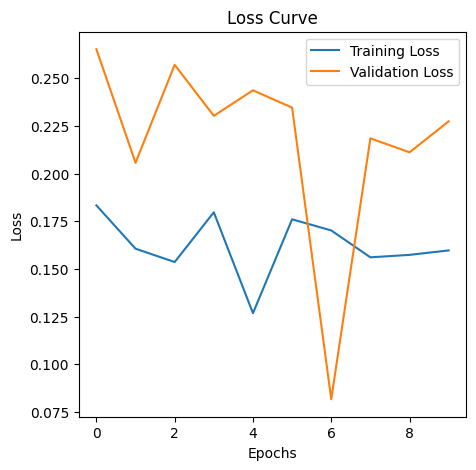

In [14]:
history_fine_tune = fine_tune_model

# Plot loss curve for train and val sets from fine_tune_model
plt.figure(figsize=(5, 5))
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Task 8: Plot accuracy curves for training and validation sets (fine tune model)**

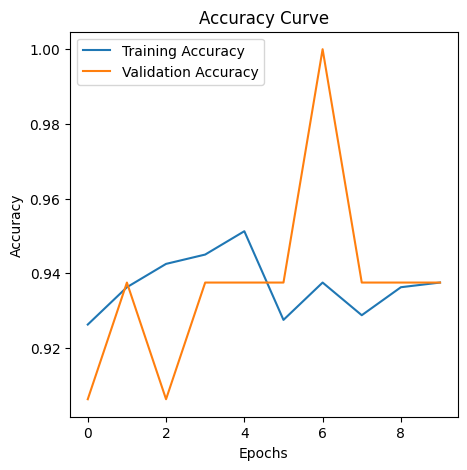

In [15]:
history_fine_tune = fine_tune_model

# Plot loss curve for train and val sets from fine_tune_model
plt.figure(figsize=(5, 5))
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Evaluate the model
extract_feat_model = tf.keras.models.load_model('feat_extract_model.keras')
fine_tune_model = tf.keras.models.load_model('fine_tune_model.keras')

print(extract_feat_model.evaluate(test_generator))
print(fine_tune_model.evaluate(test_generator))

d:\Coding\ibm-ai-engineering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 26 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
d:\Coding\ibm-ai-engineering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.8762 - loss: 0.3051
[0.38572922348976135, 0.8299999833106995]
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.8871 - loss: 0.3488
[0.37152099609375, 0.8650000095367432]


In [27]:
# Define plot image function
def plot_image_with_title(image, model_name, actual_label, predicted_label):
    plt.imshow(image)
    plt.title(f"Model: {model_name}, Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

### **Task 9: Plot a test image using Extract Features Model (index_to_plot = 1)**

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step


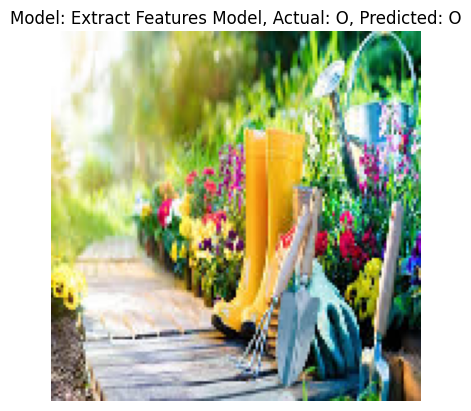

In [ ]:
import numpy as np
import glob
from pathlib import Path

test_files_O = glob.glob('data/o-vs-r-split/test/O/*')
test_files_R = glob.glob('data/o-vs-r-split/test/R/*')
test_files = test_files_O + test_files_R

test_imgs = [tf.keras.preprocessing.image.load_img(img, target_size=(IMG_ROWS, IMG_COLS)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [Path(img).parent.name for img in test_files]

class2num = lambda label: [0 if x == 'O' else 1 for x in label]
num2class = lambda label: ['O' if x < 0.5 else 'R' for x in label]

test_labels_encoded = class2num(test_labels)

predictions_extract_feat_model = extract_feat_model.predict(test_imgs)
predictions_extract_feat_model = num2class(predictions_extract_feat_model)

predictions_fine_tune_model = fine_tune_model.predict(test_imgs)
predictions_fine_tune_model = num2class(predictions_fine_tune_model)

# Plot a test image using the extract features model (index_to_plot=1)
index_to_plot = 1
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),
    model_name='Extract Features Model',
    actual_label=test_labels[index_to_plot], 
    predicted_label=predictions_extract_feat_model[index_to_plot],
)

### **Task 10: Plot a test image using Fine-Tuned Model (index_to_plot = 1)**

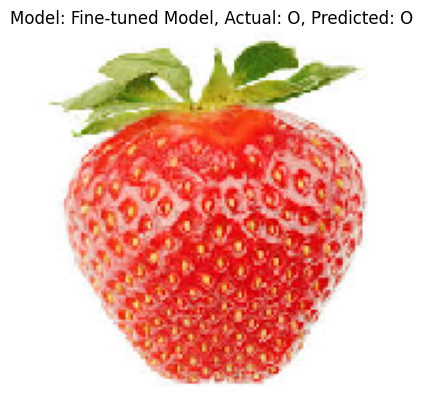

In [35]:
# Specify index of image to plot, for example index 0
index_to_plot = 0
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),
    model_name='Fine-tuned Model',
    actual_label=test_labels[index_to_plot], 
    predicted_label=predictions_fine_tune_model[index_to_plot],
)